In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

In [2]:
def system_equations(y, t, beta, lambd, s, s1, s0, delta, delta0):
    # Parameter tetap
    d = 0.003659320936
    b = 0.01619583476
    a = 0.3
    r = b - d
    K = 150000
    L = 10000 #tetap
    v = 0.2
    alpha = 0.000001
    Q0 = 0
    l = 0.0005 #belom diubah
    X, Y, N, B, E = y
    
    Xdot = (b - a * r * (N / K)) * N - (d + (1 - a) * r * N / K) * X - (beta * Y + lambd * B) * X + v * Y
    Ydot = (beta * Y + lambd * B) * X - (v + alpha + d + (1 - a) * r * N / K) * Y
    Ndot = r * (1 - N / K) * N - alpha * Y
    Bdot = s * B * (1 - (B / L)) + s1 * Y - s0 * B + delta * B * E
    Edot = Q0 + l * N - delta0 * E
    
    return [Xdot, Ydot, Ndot, Bdot, Edot]

In [3]:
def fit_function(t, beta, lambd, s, s1, s0, delta, delta0):
    # Initial conditions
    ya = 1105
    na = 76025
    xa = na - ya
    ba = 33.33964821
    ea = 55.27487318
    
    # Solve the ODE system
    solution = odeint(system_equations, [xa, ya, na, ba, ea], t, args=(beta, lambd, s, s1, s0, delta, delta0))
    
    X = solution[:, 0]
    Y = solution[:, 1]
    N = solution[:, 2]
    
    return Y

In [13]:
mod = lmfit.Model(fit_function)
# Set the parameters (and some initial parameter guesses)
mod.set_param_hint("beta", value=0.0000005, vary=True, min=0, max=1)
mod.set_param_hint("lambd", value=0.000000005, vary=True, min=0,max=1)
mod.set_param_hint("s", value=75, vary=True, min=0)
mod.set_param_hint("s1", value=5112.32, vary=True, min=0)
mod.set_param_hint("s0", value=22, vary=True, min=0)
mod.set_param_hint("delta", value=4229.02 , vary=True, min=0)
mod.set_param_hint("delta0", value=3000.00000637, vary=True, min=0)
params = mod.make_params()
#R^2 --0.17159145	

In [14]:
# Data
t_data = np.linspace(0, 50, 8)
y_data = np.array([1105,3192,826,2316,2085,2091,1845,1712]) 

N_data = np.array([76025,77547,79007,80496,81881,83288,84578,85887])  
X_data = N_data - y_data 
B_data=np.array([33.33964821,33.33964821,33.33964821,33.33964821,526.415498,842.2647968,33.33964821,33.33964821])
E_data=np.array([55.27487318,56.38146124,57.44297146,58.52556648,59.53254707,60.55552302,61.49343274,62.44515663])

In [15]:
result = mod.fit(y_data, params, method="leastsq", t=t_data, X=X_data, N=N_data, B = B_data, E = E_data)  # Fitting

{'beta': 4.817397291079217e-07,
 'lambd': 1.416506242857274e-07,
 's': 74.99849393254826,
 's1': 5112.424450654552,
 's0': 21.815554703699398,
 'delta': 4229.299711634311,
 'delta0': 2999.841705451772}

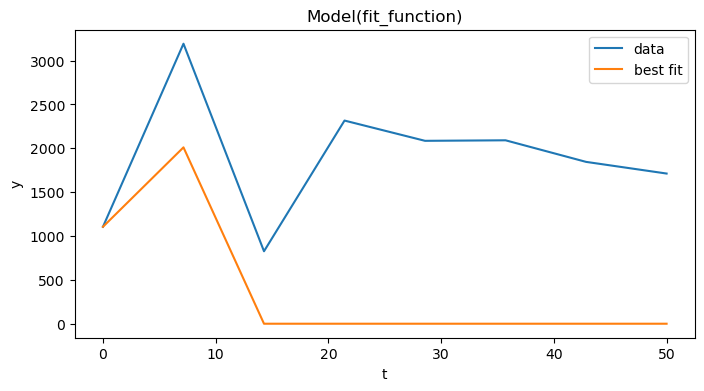

In [16]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

In [17]:
result